In [55]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# !ls "/content/drive/Mydrive"

intro_images_path='/content/drive/MyDrive/Colab Notebooks/Images/Intro_images/'
edge_images_path='/content/drive/MyDrive/Colab Notebooks/Images/Edge_images/'
seg_images_path='/content/drive/MyDrive/Colab Notebooks/Images/Seg_images/'
feature_images_path='/content/drive/MyDrive/Colab Notebooks/Images/Feature_images/'
output_images_path='/content/drive/MyDrive/Colab Notebooks/Images/Output_images/'

Mounted at /content/drive


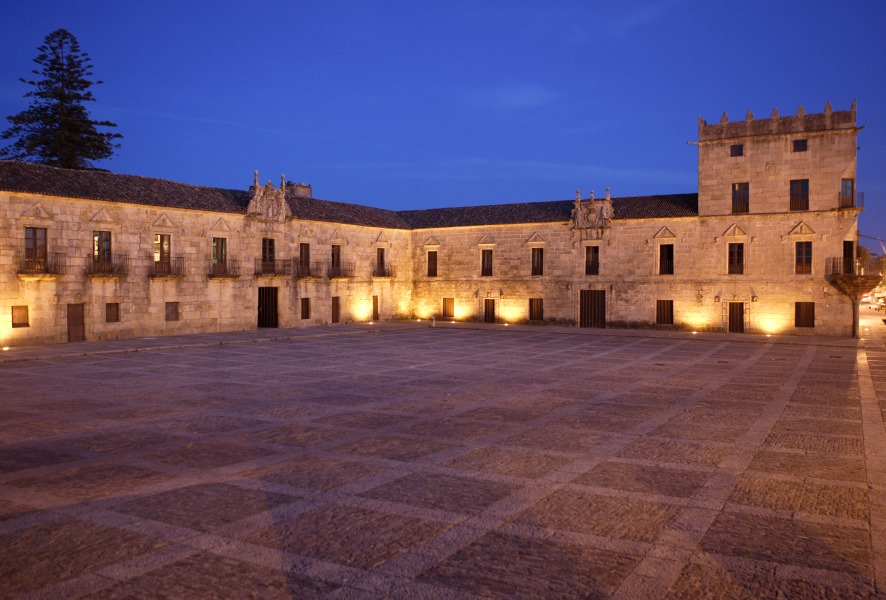

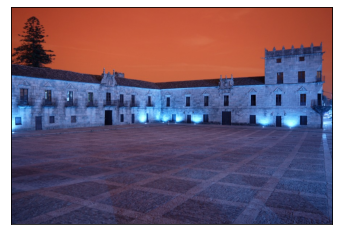

In [56]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import sys
from google.colab.patches import cv2_imshow

# Load an color image in grayscale
path = intro_images_path+'pazo.jpg'
img = cv2.imread(path)
cv2_imshow(img)

plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


### EXERCISE 1: Image Geometric Transformations
In this exercice, we have learned more about the notion of geometric transformations for Images, here are some common geometric transformations that can be applied to images:

- Scaling: This transformation changes the size of the image. Scaling can be done in two ways - upscaling and downscaling. Upscaling increases the size of the image, whereas downscaling decreases the size of the image.

* Rotation: This transformation rotates an image by a specified angle. It can be done in either a clockwise or counterclockwise direction.

* Translation: This transformation moves an image in any direction by a specified amount of pixels. It is used to shift the image to a new position.

* Shearing: This transformation changes the shape of an object by slanting it along the x or y-axis.

* Flipping: This transformation flips the image horizontally or vertically.

* Cropping: This transformation removes a portion of the image by selecting a rectangular region of interest (ROI) from the image.

* Perspective Transform: This transformation is used to transform the perspective of an image. It is used to make an object appear closer or farther away, or to change its perspective from one viewpoint to another.

These geometric transformations can be applied to images using various libraries like OpenCV, PIL, and scikit-image in Python. Each of these libraries provides functions for applying the above transformations.

### Purpose of the exercice  :
Transform the image torre_hercules_1.jpg to get a view of the same scene as if it were captured from the same point of view as is observed torre_hercules_2.jpg

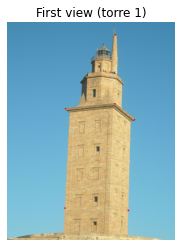

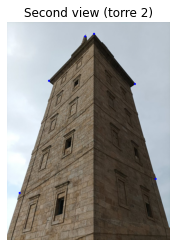

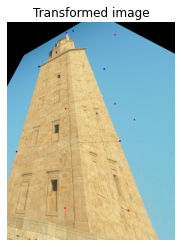

In [57]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

# Read first view 
im1 = cv2.imread(intro_images_path+'torre_hercules_1.jpg',  cv2.IMREAD_COLOR) 

# Read second view 
im2 = cv2.imread(intro_images_path+'torre_hercules_2.jpg', cv2.IMREAD_COLOR) 

im1=cv2.cvtColor(im1, cv2.COLOR_BGR2RGB) 
im2=cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
# print(im1.shape)

# Location of reference points
points1 = np.zeros((6, 2), dtype=np.float32) 
points2 = np.zeros((6, 2), dtype=np.float32)

# INSERT THE COORDINATES OF THE POINTS 
points1[0, :] = [678,514]
points1[1, :] = [800,614]
points1[2, :] = [678,80]
points1[3, :] = [762,1184]
points1[4, :] = [367,545]
points1[5, :] = [364,1170]

points2[0, :] = [415,56]
points2[1, :] = [610,295]
points2[2, :] = [373,68]
points2[3, :] = [709, 748]
points2[4, :] = [200,280]
points2[5, :] = [60,815]

im1c=im1.copy()
im2c=im2.copy()

# Display the points on our 2 pictures
for pt in points1:
    cv2.circle(im1c, (int(pt[0]), int(pt[1])),5, (255, 0, 0),-1)

for pt in points2:
    cv2.circle(im2c, (int(pt[0]), int(pt[1])),5, (0, 0, 255),-1)

# Find homography 
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC) 

# Use homography to align im1 with im2 
height1, width1, _ = im1.shape 
height2, width2, _ = im2.shape 

#Aligned image im1Reg, using a 3x3 transformation matrix 
imP = cv2.warpPerspective(im1, h, (1*width1 + 0*width2, 1*height1+ 0*height2)) 

for pt in points1:
    cv2.circle(imP, (int(pt[0]), int(pt[1])),5, (255, 0, 0),-1)
for pt in points2:
    cv2.circle(imP, (int(pt[0]), int(pt[1])),5, (0, 0, 255),-1)

plt.imshow(im1c), plt.title("First view (torre 1)")
plt.axis('off')
plt.show() 

plt.imshow(im2c), plt.title("Second view (torre 2)")
plt.axis('off')
plt.show()

plt.imshow(imP), plt.title("Transformed image")
plt.axis('off')
plt.show()

### EXERCISE 2: Template Matching and Gaussian Pyramid

Template Matching and Gaussian Pyramid are two important concepts in image processing.

Template Matching is a technique used to find a template image within a larger image. The process involves comparing a small template image with a larger search image, by sliding the template over the search image and computing the similarity between the two at each position. The output of the technique is a set of pixel coordinates in the larger image that match the template.

OpenCV provides a built-in function called cv2.matchTemplate() for performing template matching. This function takes a template image and a search image as inputs, and outputs a matrix containing the similarity scores at each pixel location. The location with the highest score indicates the position of the best match.

Gaussian Pyramid, on the other hand, is a method used for image smoothing and down-sampling. The idea behind Gaussian Pyramid is to reduce the size of the image while retaining its essential features. The process involves applying a Gaussian filter to the image, followed by down-sampling. The result is a series of images, where each image in the series has a smaller size than the previous one. This creates a pyramid-like structure of images, where the top of the pyramid is the original image and the bottom is the smallest image.

OpenCV provides a built-in function called cv2.pyrDown() for performing Gaussian Pyramid. This function takes an input image as an input, and outputs a reduced size image by applying a Gaussian filter and then down-sampling the image.


#### Purpose of the exercice: 
Based on the exercises about template matching and the construction of Gaussian pyramids try to detect as much tunas as posible in the image Tuna_Relative_Sizes.jpg given the template in Tuna_template.jpg.

(312, 703)


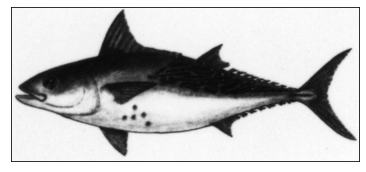

(312, 703)
(156, 352)


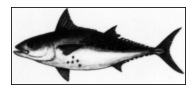

(78, 176)


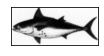

(39, 88)


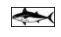


end of the downsizing 

Template Matching method :



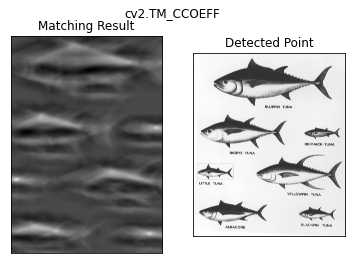

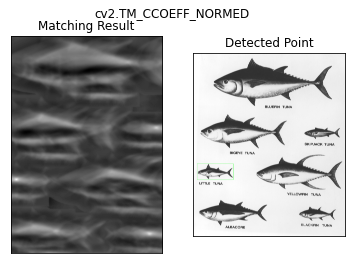

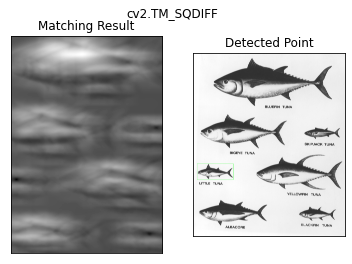

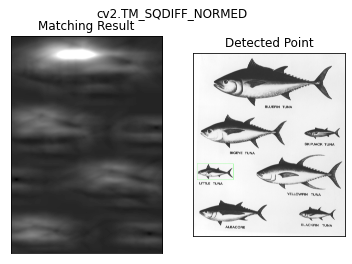

In [58]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(intro_images_path+'Tuna_Relative_Sizes.jpg',0)
img2 = img.copy()
template = cv2.imread(intro_images_path+'Tuna_template.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# Use Gaussian Pyramid to downsize the image from (312, 703) to (39, 88)
image = template

def pyramid(layer, l=4, minSizex=8, minSizey=8):
    level=0
    yield layer
    print(layer.shape)
    while True:
        layer = cv2.pyrDown(layer)
        if level== l or layer.shape[0]<minSizex or layer.shape[1]<minSizey:
            break
        yield layer
        level=level+1
        
for layer in pyramid(image, l=3):
  print(layer.shape)
  plt.figure(figsize= (0.02*layer.shape[0],0.02*layer.shape[1]))
  plt.imshow(layer,cmap='gray')
  plt.xticks([]), plt.yticks([]) 
  plt.show()
print()
print("end of the downsizing ")
print()
print("Template Matching method :")
print()

# Use the downsized image to match the results
template=image.copy()

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    cv2.rectangle(img,top_left, bottom_right, [0,255,0], 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

## Exercise 3: Edge Detection

Edge transformation is a technique used in image processing to detect edges in an image. An edge is defined as the boundary between two regions with different intensities. Edge detection is important in image analysis as it helps to extract meaningful information from images.

There are several edge detection techniques, including:

* Sobel Operator: This technique uses a 3x3 kernel to detect edges by calculating the gradient of the image intensity at each pixel location.

* Canny Edge Detector: This is a popular edge detection technique that uses a multi-stage algorithm to detect edges in an image. The algorithm involves smoothing the image with a Gaussian filter, calculating the gradient magnitude and direction, suppressing non-maximum edges, and finally applying hysteresis thresholding to obtain the final edges.

* Laplacian of Gaussian (LoG): This technique convolves an image with a Gaussian filter followed by a Laplacian filter to detect edges.

Once the edges are detected, additional operations can be applied to further refine the results. These operations include thresholding, non-maximum suppression, and hysteresis thresholding.

In Python, edge detection techniques can be implemented using various libraries like OpenCV, scikit-image, and Pillow. For example, in OpenCV, the cv2.Canny() function can be used to perform Canny Edge Detection, while the cv2.Sobel() function can be used to perform Sobel Edge Detection.

### Exercice:

1. Select the best values for threshold1, threshold2, and gaussian blurring, for each of the following images: chuvia.jpg, xardin.jpg, paseo.jpg.

2. Try with some authomatic simple methods as: (1) computing the median gray-level values and determine high and low thresholds as simmetric values around the median; (2) setting thresholds based on the maximum of the gradient; (3) ....; work well depending on the image context.

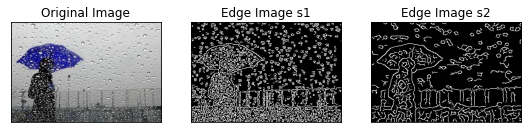

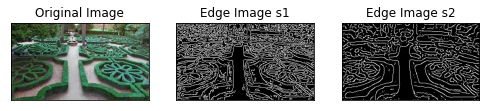

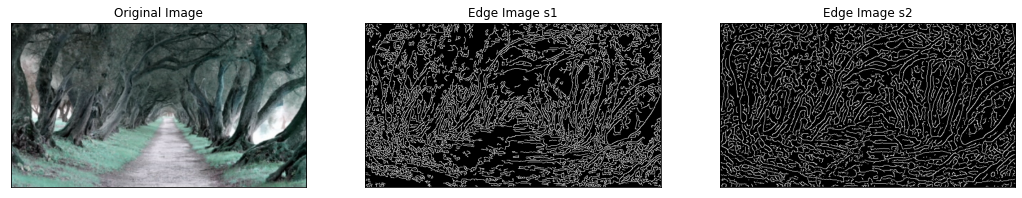

In [59]:
img_path=['chuvia.jpg', 'xardin.jpg', 'paseo.jpg']

for img in img_path:
  image = cv2.imread(edge_images_path+img)
  # cv2_imshow(image)

  img=cv2.GaussianBlur(image,(3,3),0)
  edges = cv2.Canny(img,40,70,apertureSize=3,L2gradient=True)

  plt.figure(figsize=(0.05*img.shape[0],0.05*img.shape[1]))
  plt.subplot(131),plt.imshow(image,cmap = 'gray')
  plt.title('Original Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(132),plt.imshow(edges,cmap = 'gray')
  plt.title('Edge Image s1'), plt.xticks([]), plt.yticks([])


  img=cv2.GaussianBlur(image,(15,15),0) 
  edges = cv2.Canny(img,5,15,apertureSize=3,L2gradient=True)

  plt.subplot(133),plt.imshow(edges,cmap = 'gray')
  plt.title('Edge Image s2'), plt.xticks([]), plt.yticks([])
  plt.show()

As we can see, the parameters are not good for each image, we can see that for the first image, edge detection is quiet good but not for the last one.

Let's change the parameters for each image to have better results:

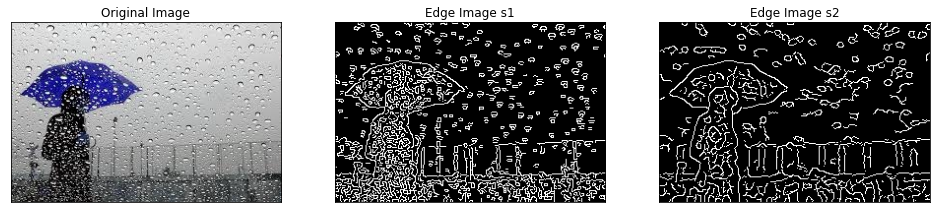

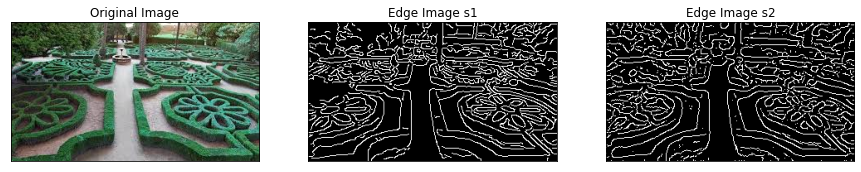

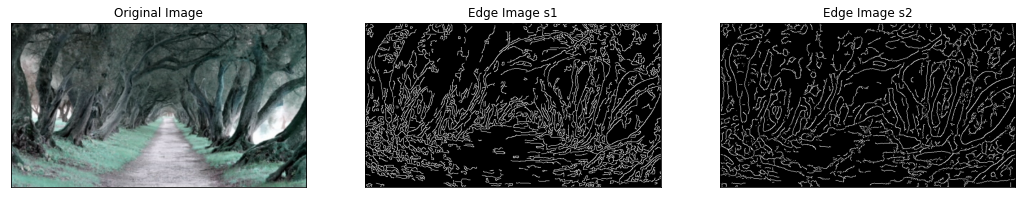

In [60]:
### First image (chuvia)

image = cv2.imread(edge_images_path+'chuvia.jpg')

img=cv2.GaussianBlur(image,(5,5),0)
edges = cv2.Canny(img,40,80,apertureSize=3,L2gradient=True)

plt.figure(figsize=(0.09*img.shape[0],0.09*img.shape[1]))
plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image s1'), plt.xticks([]), plt.yticks([])


img=cv2.GaussianBlur(image,(15,15),0) 
edges = cv2.Canny(img,5,15,apertureSize=3,L2gradient=True)

plt.subplot(133),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image s2'), plt.xticks([]), plt.yticks([])
plt.show()

### second image (xardin)

image = cv2.imread(edge_images_path+'xardin.jpg')

img=cv2.GaussianBlur(image,(7,7),0)
edges = cv2.Canny(img,50,70,apertureSize=3,L2gradient=True)

plt.figure(figsize=(0.09*img.shape[0],0.09*img.shape[1]))
plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image s1'), plt.xticks([]), plt.yticks([])


img=cv2.GaussianBlur(image,(15,15),0) 
edges = cv2.Canny(img,5,15,apertureSize=3,L2gradient=True)

plt.subplot(133),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image s2'), plt.xticks([]), plt.yticks([])
plt.show()

### third image (paseo)

image = cv2.imread(edge_images_path+'paseo.jpg')

img=cv2.GaussianBlur(image,(5,5),0)
edges = cv2.Canny(img,40,80,apertureSize=3,L2gradient=True)

plt.figure(figsize=(0.05*img.shape[0],0.05*img.shape[1]))
plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image s1'), plt.xticks([]), plt.yticks([])


img=cv2.GaussianBlur(image,(21,21),0) 
edges = cv2.Canny(img,10,20,apertureSize=3,L2gradient=True)

plt.subplot(133),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image s2'), plt.xticks([]), plt.yticks([])
plt.show()


### EXERCISE 4: Intensity and Edge Matching

Intensity matching and edge matching are two different techniques used in computer vision and image processing.

Intensity matching refers to the process of adjusting the brightness and contrast of an image to make it more visually appealing or to improve its suitability for a particular application. This is achieved by adjusting the intensity values of the image pixels to stretch or compress the image histogram.

Edge matching, on the other hand, is the process of aligning and merging two or more images based on their edges. This is particularly useful in applications such as image stitching, where multiple images need to be combined into a single larger image.


---
---

#### Exercise : 
Compare the following two template matching alternatives  regarding their  performance : (i) case of using image intensity as features for matching, and  (ii) case of using their edge maps as matching features. Use faces.jpg and two different templates right_eye.jpg and right_eye_i.jpg. You  will have to compute their edge maps before computing the correlation in case (ii).



### EXERCISE: Hough Transform

The Hough Transform is a technique used to detect shapes in images. In particular, it is commonly used to detect lines in images. The basic idea behind the Hough Transform for lines is to represent each line in the image as a point in a parameter space.

To understand how this works, consider a line in an image. This line can be described by its equation in the form y = mx + b, where m is the slope of the line and b is the y-intercept. However, this equation is not suitable for the Hough Transform, since it is not unique for each line.

Instead, we can use a different representation of the line, known as the Hesse normal form. In this representation, the line is described by its perpendicular distance from the origin, r, and the angle between the line and the x-axis, θ. This representation is unique for each line, and is given by the equation r = xcos(θ) + ysin(θ).

The Hough Transform can be extended to detect other shapes, such as circles and ellipses, by using different parameterizations of the shape.

---
---

#### EXERCISE 5: Hough Transform Lines

Consider the image naval.jpg. Try to detect lines with the best trade-off between the numbers of True Positive and False Negative. Consider different levels of smoothing before applying the Canny detector.

---
---


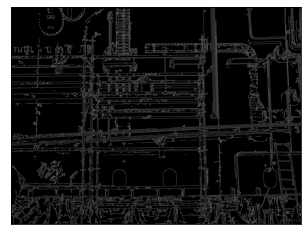

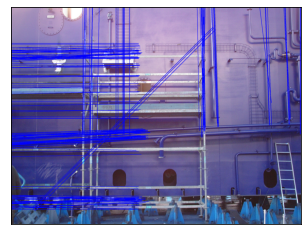

In [61]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

img = cv2.imread(edge_images_path+'naval.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=img
imgP=img.copy()

gray = cv2.GaussianBlur(img,(7,7),0)
edges = cv2.Canny(gray,1,50,apertureSize=3,L2gradient=True)
lines = cv2.HoughLines(edges,1,np.pi/180,300)

#Draw all the lines
if lines is not None:
  for i in range(0,len(lines)):
      rho = lines[i][0][0]
      theta = lines[i][0][1]
      a = np.cos(theta)
      b = np.sin(theta)
      x0 = a * rho
      y0 = b * rho
      pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
      pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
      cv2.line(imgP, pt1, pt2, (0,0,255), 2)

plt.imshow(edges,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(imgP,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

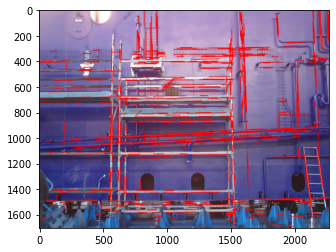

In [62]:
linesP = cv2.HoughLinesP(edges,1,np.pi/180,200,minLineLength=50,maxLineGap=10)

imgP=img.copy()

if linesP is not None:
   for i in range(0, len(linesP)):
      l = linesP[i][0]
      cv2.line(imgP, (l[0], l[1]), (l[2], l[3]), (255,0,0), 3, cv2.LINE_AA)


plt.imshow(imgP)
plt.show()

---
---
### EXERCISE 6: Hough Transform Circles

Implement a program for the estimation of the number of fishes in fishes.jpg image, according to the number of detected eyes. Choose the most convenient parameters.

---
---

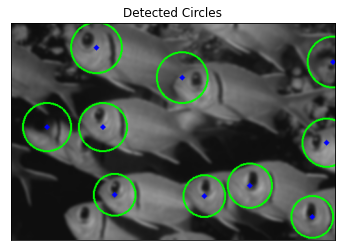


number of fishes detected : 10


In [63]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

img = cv2.imread(feature_images_path+'fishes.jpg',0)
img = cv2.GaussianBlur(img,(9,9),2)

cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)


circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,dp=2,minDist=70, param1=60,param2=38,minRadius=30,maxRadius=40)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)
plt.title('Detected Circles'), plt.xticks([]), plt.yticks([])
plt.show()

print('')
print("number of fishes detected :", len(circles[0]))


### EXERCISE : Image thresholding

Image thresholding is a technique used in image processing to separate objects or regions of interest from the background by creating a binary image. The basic idea is to convert a grayscale or color image into a binary image, where pixels are either black or white, based on a certain threshold value. Pixels with intensity values above the threshold are set to white, while pixels with intensity values below the threshold are set to black.

---

There are several types of thresholding methods, including adaptive thresholding, and Otsu's method:

Adaptive thresholding is a more advanced technique that adjusts the threshold value for each pixel based on its local neighborhood. This method works well for images with varying illumination or contrast, and can produce better results than global thresholding.

---

Otsu's method is a popular automatic thresholding technique that calculates an optimal threshold value based on the image histogram. The goal of Otsu's method is to minimize the intra-class variance between the foreground and background pixels. This method works well for images with bimodal intensity distributions, where there is a clear separation between the foreground and background pixels.

---
---

### Adaptive thresholding Exercise : 
Consider the image penumbra.jpg. Try to find the best  parameters for enhancing the relevant details.

threshold: 80.0


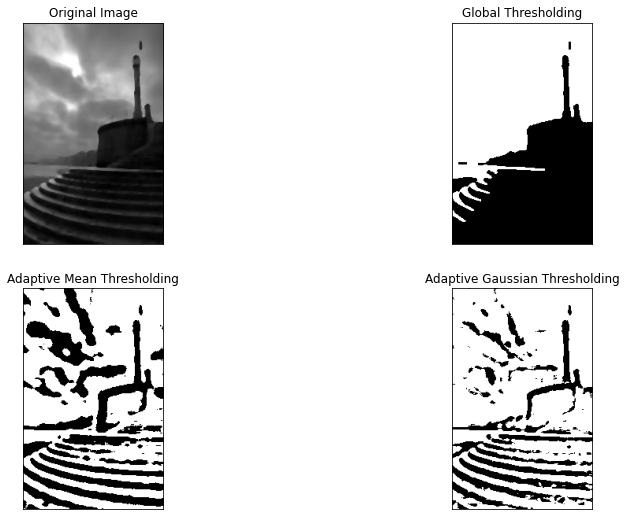

In [64]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(seg_images_path+'penumbra.jpg',0)
img = cv2.medianBlur(img,5)

C=7
blockSize=27

ret,th1 = cv2.threshold(img,80,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,blockSize,C)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,blockSize,C)

print("threshold: {}".format(ret))

titles = ['Original Image', 'Global Thresholding',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]


plt.figure(figsize=(0.05*img.shape[0],0.05*img.shape[1]))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#### Otsu’s Binarization Exercise :

Consider the image  nature_night.jpg. Find the best  threshold to segment the foreground objects.

ret1: 35.0
ret2: 56.0
ret3: 51.0


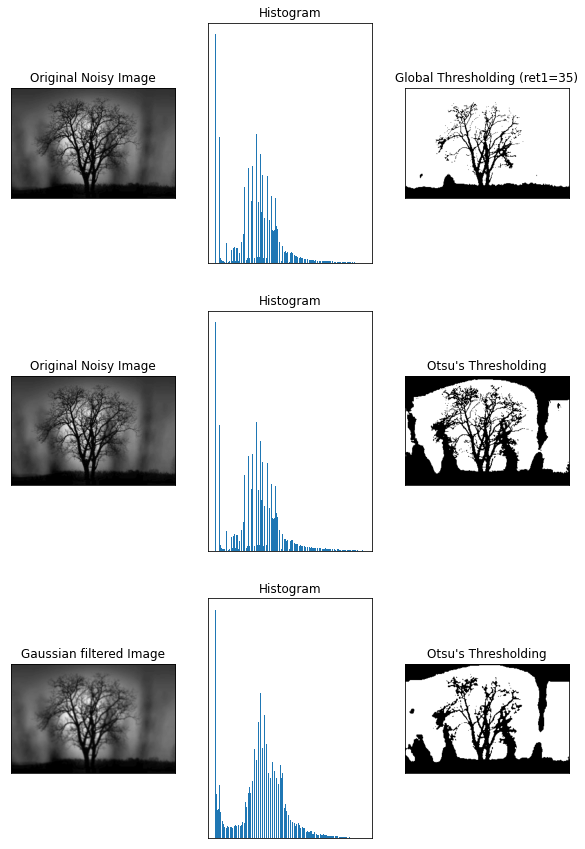

In [65]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(seg_images_path+ 'nature_night.jpg',0)

# global thresholding
ret1,th1 = cv2.threshold(img,35,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(3,3),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

print('ret1: {}'.format(ret1))
print('ret2: {}'.format(ret2))
print('ret3: {}'.format(ret3))

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (ret1=35)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(figsize=(0.05*img.shape[0],0.05*img.shape[1]))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

---
---
### EXERCISE 7:  Thresholding Based Segmentation

Consider the image hotel.jpg, find the best parameters, for thresholding and morphological operations, to obtain a mask of the hotel as accurate as possible.

---
---

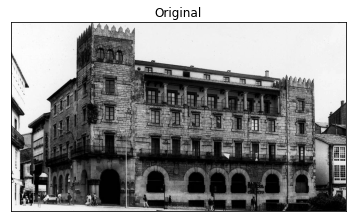

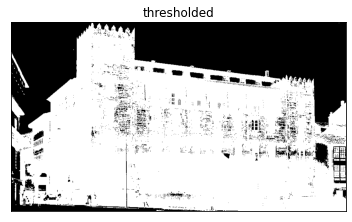

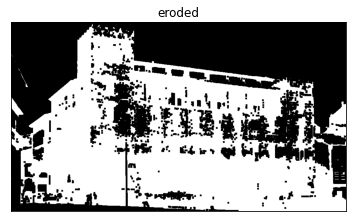

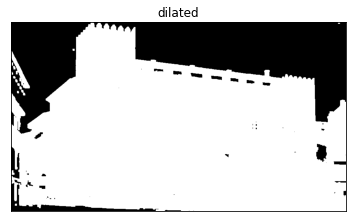

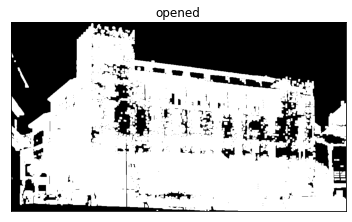

In [66]:
import cv2
import numpy as np

img = cv2.imread(seg_images_path+'hotel.jpg',0)

plt.imshow(img,'gray')
plt.title('Original')
plt.xticks([]),plt.yticks([])
plt.show()

ret1,thr = cv2.threshold(img,170,255,cv2.THRESH_BINARY_INV)

plt.imshow(thr,'gray')
plt.title('thresholded')
plt.xticks([]),plt.yticks([])
plt.show()
kernel = np.ones((5,5),np.uint8)
eroded = cv2.erode(thr,kernel,iterations = 1)

plt.imshow(eroded,'gray')
plt.title('eroded')
plt.xticks([]),plt.yticks([])
plt.show()

dilated = cv2.dilate(thr,kernel,iterations = 1)
plt.imshow(dilated,'gray')
plt.title('dilated')
plt.xticks([]),plt.yticks([])
plt.show()

opened = cv2.morphologyEx(thr, cv2.MORPH_OPEN, kernel)
plt.imshow(opened,'gray')
plt.title('opened')
plt.xticks([]),plt.yticks([])
plt.show()

### EXERCISE : K-Means

k-means clustering is a commonly used technique in image processing for performing color quantization, which reduces the number of colors used in an image while preserving the overall visual appearance. However, it can also be used for other image transformations, such as segmentation.

Image segmentation involves dividing an image into multiple regions or segments based on some criteria, such as color, texture, or brightness. k-means clustering can be used for this task by treating the pixels of an image as data points and clustering them based on their color values. The resulting clusters represent different segments of the image, which can then be used for further processing or analysis.

To perform k-means clustering on an image, the following steps can be followed:

1- Convert the image to a suitable color space, such as RGB or HSV.

2- Flatten the image into a 2D array of pixels.

3- Apply k-means clustering on the flattened array, treating each pixel as a data point and using their color values as features.

4- Assign each pixel to the cluster it belongs to, and replace its color value with the centroid of the cluster.

5- Reshape the flattened array back into the original image dimensions.

---
---

#### EXERCISE 8:

Compare the performance of k-means and mean-shift on ‘azores.jpg’ image. Choose the most convenient parameters. You can apply morphological operations to segmentation results to eliminate small irrelevant regions. Seek the best morphological operations and segmentation parameters to get the cleanest segmentation of the sky.

---
---

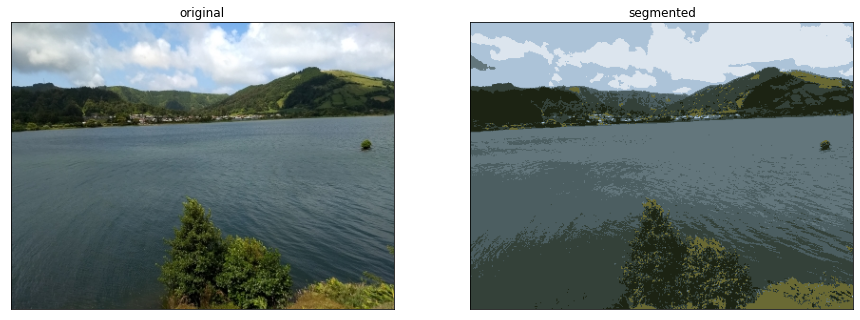

In [67]:
### K-Means :

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(seg_images_path+"azores.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to RGB
# reshape the image to a 1D array of pixels and 3 color values (RGB)

pixel_values = image.reshape((-1, 3))  #-1 represents image size
pixel_values = np.float32(pixel_values)# convert to float

# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,100,0.2)
k = 7 # number of clusters (K)
_, labels, (centers) = cv2.kmeans(pixel_values,7,None,criteria,10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)# convert back to 8 bit values
segmented_image = centers[labels.flatten()] # convert all pixels to the color of the centroids

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)

plt.figure(figsize=(0.05*image.shape[0],0.05*image.shape[1]))
plt.subplot(121)
plt.imshow(image)
plt.title('original')
plt.xticks([]),plt.yticks([])

plt.subplot(122)
plt.imshow(segmented_image)
plt.title('segmented')
plt.xticks([]),plt.yticks([])
plt.show()

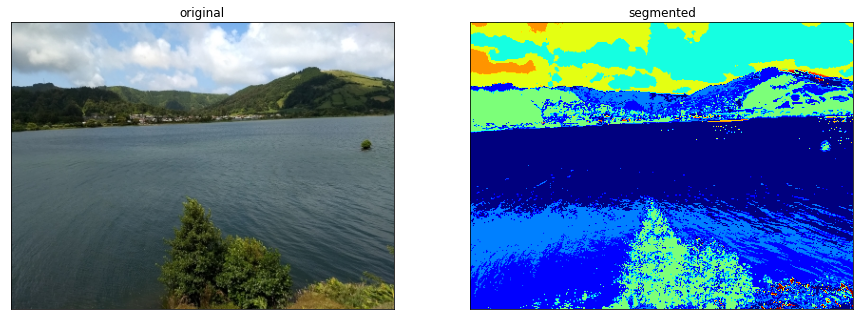

In [68]:
### Mean-shift

import cv2
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt

image = cv2.imread(seg_images_path+"azores.jpg")

image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#Need to convert image into feature array based
#on rgb intensities
flat_image=np.reshape(image, [-1, 3])
 
#Estimate bandwidth
bandwidth2 = estimate_bandwidth(flat_image, quantile=0.07, n_samples=1000)
ms = MeanShift(bandwidth=bandwidth2, bin_seeding=True)
ms.fit(flat_image)
labels=ms.labels_
 
# Plot image vs segmented image

plt.figure(figsize=(0.05*image.shape[0],0.05*image.shape[1]))
plt.subplot(121)
plt.imshow(image)
plt.title('original')
plt.xticks([]),plt.yticks([])

plt.subplot(122)
plt.imshow(np.reshape(labels, [image.shape[0],image.shape[1]]),cmap='jet')
plt.title('segmented')
plt.xticks([]),plt.yticks([])

plt.show()

#### Conclusion of the comparison : 

We cans see that K-Means is more accurate and faster than mean-shift on this image. Even though the sky details are well segmanted



---
---
### EXERCISE 9: Blob Detection

Use the blob detector to detect the ball in black-trap-rock.jpg image. Choose the most convenient parameters.

---
---

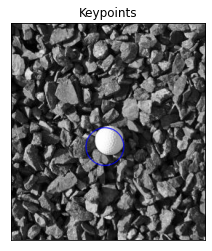

In [69]:
import cv2
import numpy as np;
from matplotlib import pyplot as plt
 
im = cv2.imread(seg_images_path+"black-trap-rock.jpg", cv2.IMREAD_GRAYSCALE)
# cv2_imshow(im)
# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create()

# Set up the detector with specific parameters.
params = cv2.SimpleBlobDetector_Params()
params.filterByColor=True #Filter by Color
params.blobColor=255
params.filterByArea = True # Filter by Area.
params.minArea = 1650
params.maxArea = 1800
params.filterByCircularity = False # Filter by Circularity
params.minCircularity = 0.2
params.filterByConvexity = False # Filter by Convexity
params.minConvexity = 0.5
params.filterByInertia = False # Filter by Inertia
params.minInertiaRatio = 0.8
params.minDistBetweenBlobs = 20 # Distance Between Blobs

# Set up the detector with specific parameters.
detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(im) # Detect blobs.

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
plt.imshow(im_with_keypoints), plt.title("Keypoints")
plt.xticks([]),plt.yticks([])
plt.show()

---
---
### EXERCISE 10: Panorma

Now, find the affine transformation between view4.jpg and view5.jg, and transform the second one and then stitch the two togetther to create a panorama: It can be done just by modifying the last part of the function
**alignImages()**.

      height1, width1, _ = im1.shape
      height2, width2, _ = im2.shape
      im1Reg = cv2.warpPerspective(im1, h, (width1 + width2, height1))
      im1Reg[0:height2, 0:width1] = im2 
    
Choose the most convenient parameters.

---
---

Reading reference image :  /content/drive/MyDrive/Colab Notebooks/Images/Feature_images/view4.jpg
Reading image to align :  /content/drive/MyDrive/Colab Notebooks/Images/Feature_images/view5.jpg


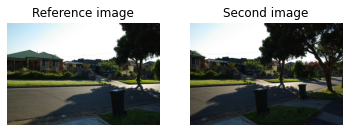

Aligning images ...


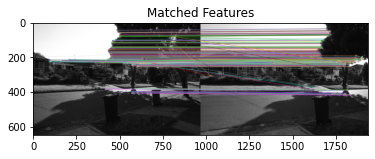

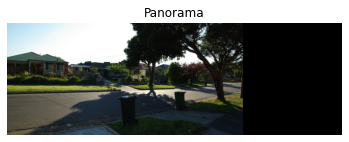

Estimated homography : 
 [[ 7.17125368e-01  2.01771697e-02  2.71795043e+02]
 [-1.05732755e-01  8.97043882e-01  4.25823612e+01]
 [-3.01246870e-04  1.41883444e-05  1.00000000e+00]]


In [70]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

MAX_FEATURES = 1500 
GOOD_MATCH_PERCENT = 0.8

def alignImages(im1, im2): 

  # Convert images to grayscale 
  im1Gray = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY) 
  im2Gray = cv2.cvtColor(im2, cv2.COLOR_RGB2GRAY) 

  # Detect ORB features and compute descriptors. 
  orb = cv2.ORB_create(nfeatures=MAX_FEATURES) 
  kpts1, descriptors1 = orb.detectAndCompute(im1Gray,None) 
  kpts2, descriptors2 = orb.detectAndCompute(im2Gray,None) 

  # create BFMatcher object 
  matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) 

  # Match features.    
  matches = matcher.match(descriptors1, descriptors2) 

  # Sort matches by score 
  matches = sorted(matches, key = lambda x:x.distance) 

  # Remove not so good matches 
  numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT) 
  matches = matches[:numGoodMatches] 

  # Draw top matches 
  imMatches=cv2.drawMatches(im1Gray,kpts1,im2Gray,kpts2, matches, None,flags=2) 

  plt.imshow(imMatches), plt.title('Matched Features'), plt.show() 


  # Extract location of good matches 
  points1 = np.zeros((len(matches), 2), dtype=np.float32) 
  points2 = np.zeros((len(matches), 2), dtype=np.float32) 


  for i, match in enumerate(matches): 
    points1[i, :] = kpts1[match.queryIdx].pt 
    points2[i, :] = kpts2[match.trainIdx].pt 

    
  # Find homography 
  h, mask = cv2.findHomography(points1, points2, cv2.RANSAC) 

  # Use homography to align im1 with im2 

  height1, width1, _ = im1.shape
  height2, width2, _ = im2.shape

  #Aligned image im1Reg, using a 3x3 transformation matrix 

  im1Reg = cv2.warpPerspective(im1, h, (width1 + width2, height1))
  im1Reg[0:height2, 0:width1] = im2 
    
  return im1Reg, h 


if __name__ == '__main__': 

  # Read reference image 
  refFilename = feature_images_path+'view4.jpg' 
  print("Reading reference image : ", refFilename) 
  imReference = cv2.imread(refFilename, cv2.IMREAD_COLOR)
  imReference=cv2.cvtColor(imReference, cv2.COLOR_BGR2RGB)
    
 # Read image to be aligned 
  imFilename = feature_images_path+'view5.jpg'
  print("Reading image to align : ", imFilename);   
  im = cv2.imread(imFilename, cv2.IMREAD_COLOR) 
  im=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  
  plt.subplot(1,2,1)
  plt.imshow(imReference), plt.title("Reference image")
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(im), plt.title("Second image")
  plt.axis('off')
  plt.show()
    

  print("Aligning images ...") 

  # Registered image will be stored in imReg. 
  # The estimated homography will be stored in h. 
  imReg, h = alignImages(im,imReference) 
  
  # Write aligned image to disk. 

  plt.imshow(imReg), plt.title("Panorama")
  plt.axis('off')
  plt.show()

  # Print estimated homography 

  print("Estimated homography : \n",  h) 